# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [1]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 59 (delta 11), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (59/59), 4.93 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1. m(a+bX) = 1/N ∑(a + bxi)

  = 1/N (Na + b∑xi)

  = a + b(1/N ∑xi)

  = a + b × m(X)

2. cov(X, a+bY) = 1/N ∑(xi - m(X))((a + byi) - m(a + bY))

  = 1/N ∑(xi - m(X))(a + byi - (a + bm(Y)))

  = 1/N ∑(xi - m(X))(b(yi - m(Y)))

  = b × 1/N ∑(xi - m(X))(yi - m(Y))

  = b × cov(X,Y)

3. cov(a+bX, a+bX) = b × cov(X, a+bX)
    
  = b × b × cov(X,X)

  = b^2 × cov(X,X)

  cov(X,X) = 1/N ∑(xi - m(X))(xi - m(X))

  = 1/N ∑(xi - m(X))^2

  = s^2

4. For a non-decreasing transformation g(X), the median of g(X) is indeed equal to g(median(X)). This is because the order of the data points is preserved under a non-decreasing transformation.

  This property applies to any quantile, not just the median. The p-th quantile of g(X) will be g(p-th quantile of X) for any p between 0 and 1.

  For the Interquartile Range (IQR), which is the difference between the 75th and 25th percentiles, the property holds in a slightly modified form:
  IQR(g(X)) = g(75th percentile of X) - g(25th percentile of X)

  For the range, which is the difference between the maximum and minimum values, the property also holds:
  Range(g(X)) = g(max(X)) - g(min(X))

5. It is not always true that m(g(X)) = g(m(X)) for a non-decreasing transformation g().

  Consider a simple counter-example:
  Let X be {1, 3, 5} and g(x) = x^2

  m(X) = (1 + 3 + 5) / 3 = 3
  g(m(X)) = g(3) = 3^2 = 9

  m(g(X)) = m({1^2, 3^2, 5^2}) = (1 + 9 + 25) / 3 = 35/3 ≈ 11.67

  Clearly, m(g(X)) ≠ g(m(X)) in this case.

  This inequality holds because the mean is sensitive to the specific values of the data points, not just their order. Non-linear transformations can change the relative distances between data points, affecting the mean differently than they affect order statistics like the median.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#1

df = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv')

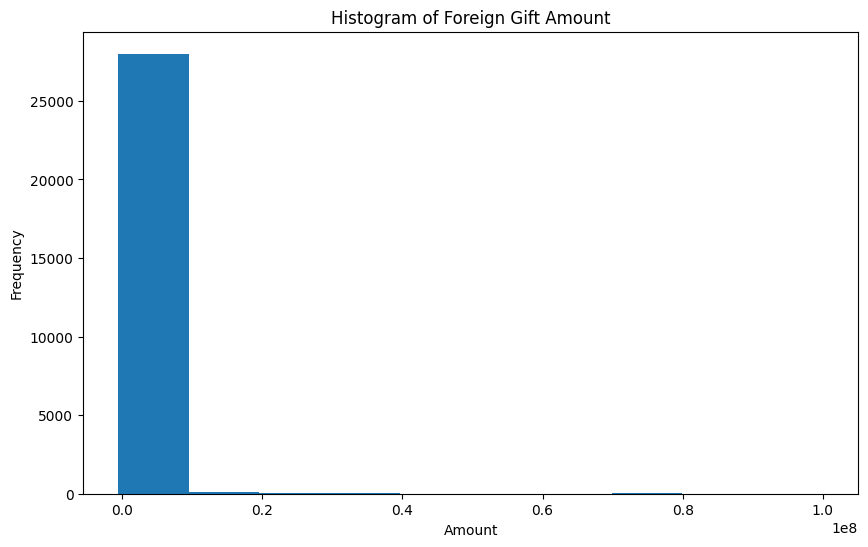

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [9]:
#2

plt.figure(figsize=(10, 6))
plt.hist(df['Foreign Gift Amount'], bins=10)
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

print(df['Foreign Gift Amount'].describe())

The histogram clearly shows that the distribution of "Foreign Gift Amount" is heavily right-skewed. This means that the majority of the gifts are relatively small in amount, while a few gifts are very large, pulling the tail of the distribution to the right.

In [10]:
#3
gift_type_counts = df['Gift Type'].value_counts(normalize=True)
print(gift_type_counts)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


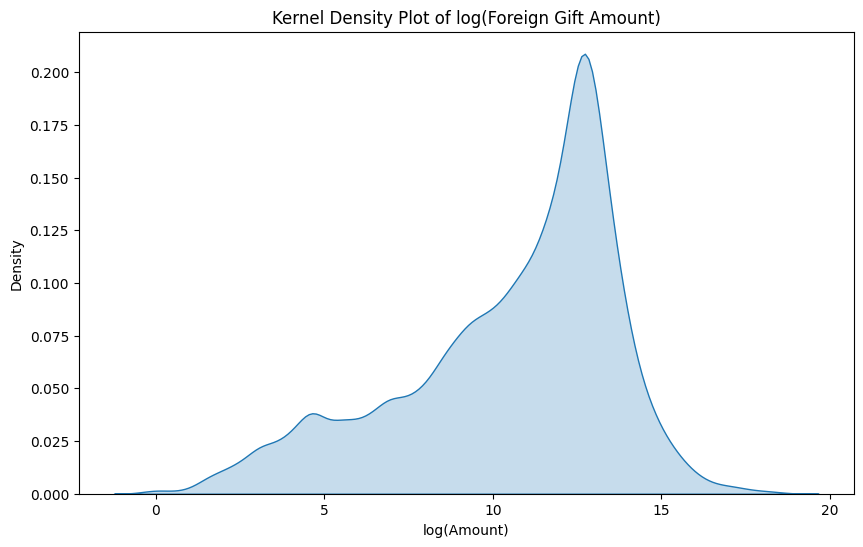

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


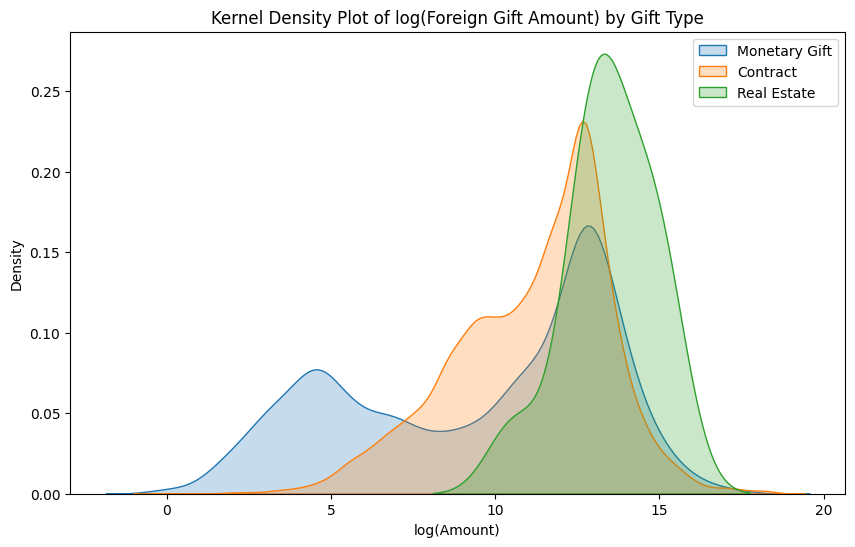

In [15]:
#4
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log(df['Foreign Gift Amount']), fill=True)
plt.title('Kernel Density Plot of log(Foreign Gift Amount)')
plt.xlabel('log(Amount)')
plt.show()
plt.figure(figsize=(10, 6))
for gift_type in df['Gift Type'].unique():
    sns.kdeplot(np.log(df[df['Gift Type'] == gift_type]['Foreign Gift Amount']),
                fill=True, label=gift_type)
plt.title('Kernel Density Plot of log(Foreign Gift Amount) by Gift Type')
plt.xlabel('log(Amount)')
plt.legend()
plt.show()


The first density reveals a multi-modal distribution, suggesting that there are several distinct "clusters" of gift amounts. It's hard to tell how many modes there really are, but you can see at least two or three bumps.

The second density plot reveals that for monetary gifts appears to have a peak near the zero value. This suggests that log transformation may not have been the best choice for monetary gift, and a box-cox transformation would be better.

In [18]:
#5
top_countries_count = df['Country of Giftor'].value_counts().head(15)
print("Top 15 countries by number of gifts:")
print(top_countries_count)

top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 countries by total amount given:")
print(top_countries_amount)

Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 countries by total amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA 

Top 15 institutions by total amount received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int

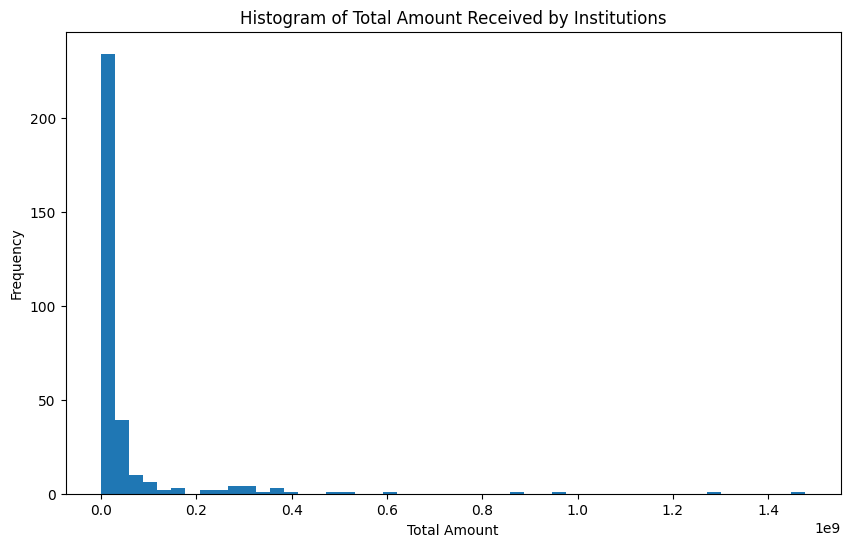

In [20]:
#6
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 institutions by total amount received:")
print(top_institutions)

plt.figure(figsize=(10, 6))
plt.hist(df.groupby('Institution Name')['Foreign Gift Amount'].sum(), bins=50)
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

In [24]:
#7.
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 giftors by total amount given:")
print(top_giftors)

Top 15 giftors by total amount given:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [32]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/EDA/assignment/data/airbnb_hw.csv')



In [33]:
#2
# Dimensions and basic information
print(f"Dimensions: {df.shape}")
print(f"Number of observations: {df.shape[0]}")
print("Variables included:")
print(df.columns.tolist())

# Examine the first few rows
print(df.head())

Dimensions: (30478, 13)
Number of observations: 30478
Variables included:
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment     

In [35]:
#3.
cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)


Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

3. Patterns in available rentals:

Apartments are the most common property type by far, with a total of 27,102 listings.

Houses are the second most common, with 2,090 listings.

Frivate rooms more common than renting the entire property for:
Bed & Breakfast, Dorm, House, Hut, Other, Tent

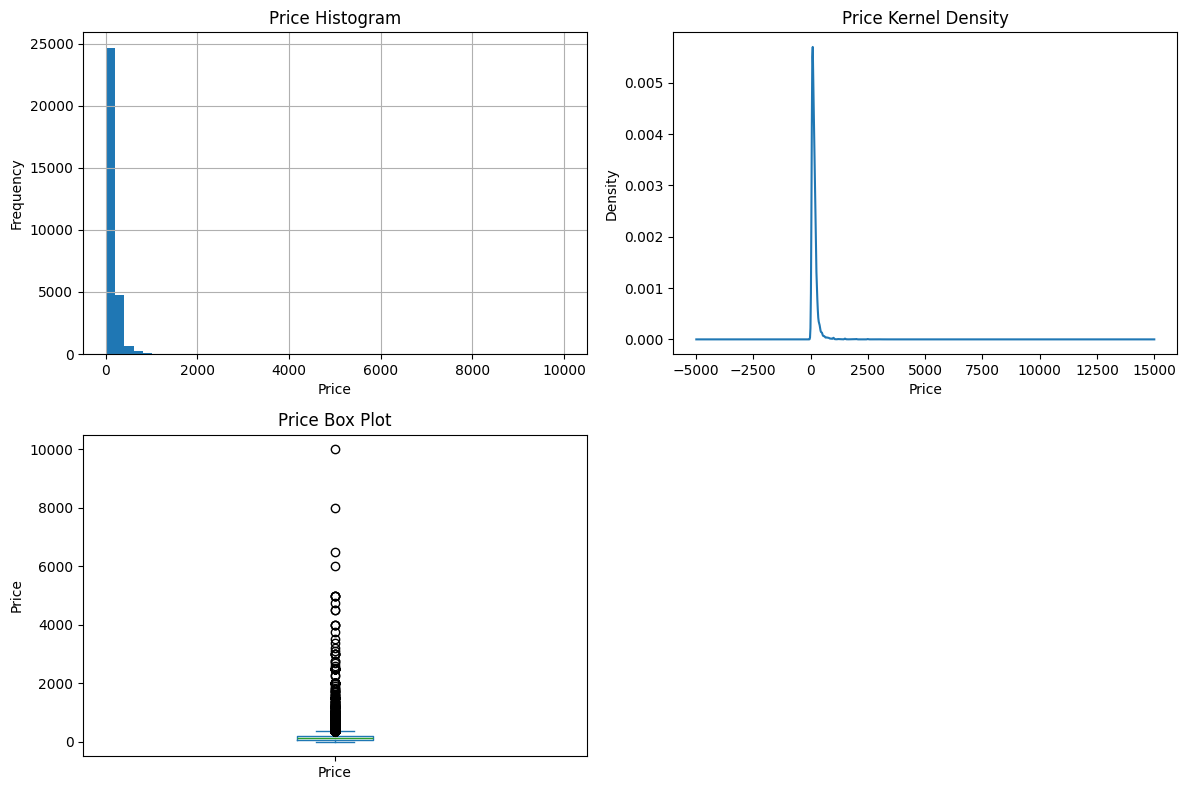

Original Price Statistics:
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


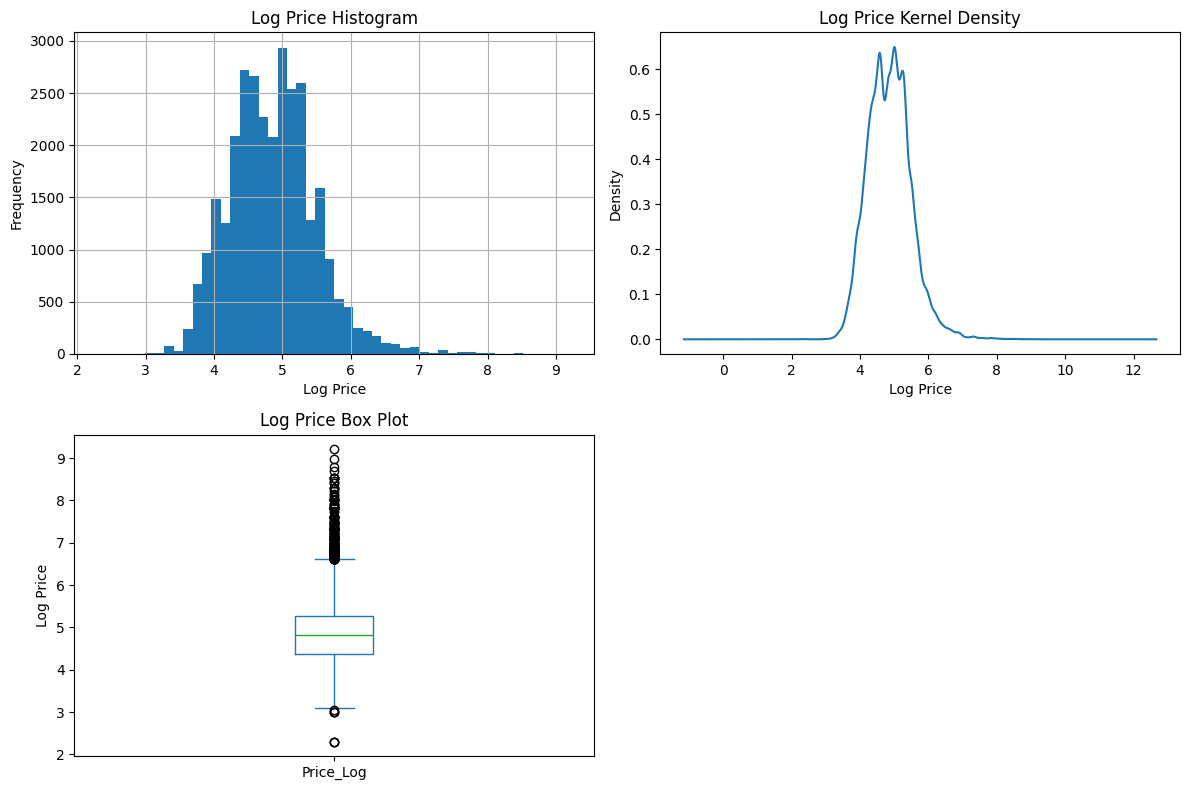


Log Price Statistics:
count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_Log, dtype: float64


In [49]:
#4
# Clean the 'Price' column by removing commas and handling missing values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])

# --- Original Price Analysis ---
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(221)
df['Price'].hist(bins=50)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Kernel Density Estimate (KDE)
plt.subplot(222)
df['Price'].plot.kde()
plt.title('Price Kernel Density')
plt.xlabel('Price')
plt.ylabel('Density')

# Box Plot
plt.subplot(223)
df['Price'].plot.box()
plt.title('Price Box Plot')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

print("Original Price Statistics:")
print(df['Price'].describe())

# --- Log-Transformed Price Analysis ---
# Add a small constant to handle zero prices before log transformation
df['Price'] = df['Price'].replace(0, 0.0001)
df['Price_Log'] = np.log(df['Price'])

plt.figure(figsize=(12, 8))

# Histogram of Log Prices
plt.subplot(221)
df['Price_Log'].hist(bins=50)
plt.title('Log Price Histogram')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

# Kernel Density Estimate (KDE) of Log Prices
plt.subplot(222)
df['Price_Log'].plot.kde()
plt.title('Log Price Kernel Density')
plt.xlabel('Log Price')
plt.ylabel('Density')

# Box Plot of Log Prices
plt.subplot(223)
df['Price_Log'].plot.box()
plt.title('Log Price Box Plot')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

print("\nLog Price Statistics:")
print(df['Price_Log'].describe())


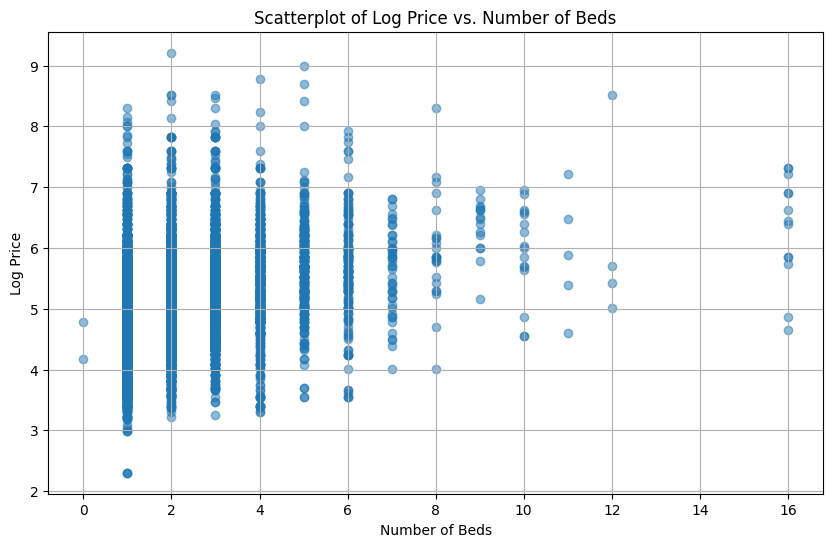


Price Description Grouped by Number of Beds:
        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   70

In [52]:
# Clean the 'Beds' column
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce')
df = df.dropna(subset=['Beds'])

# Handle zero prices
df['Price'] = df['Price'].replace(0, 0.0001)

# Log transform the 'Price' column
df['Price_Log'] = np.log(df['Price'])

# --- Scatterplot of Price_Log and Beds ---
plt.figure(figsize=(10, 6))
plt.scatter(df['Beds'], df['Price_Log'], alpha=0.5)  # Added alpha for better visualization
plt.xlabel('Number of Beds')
plt.ylabel('Log Price')
plt.title('Scatterplot of Log Price vs. Number of Beds')
plt.grid(True)  # Added grid for better readability
plt.show()

# --- Groupby Analysis ---
price_by_beds = df.groupby('Beds')['Price'].describe()
print("\nPrice Description Grouped by Number of Beds:")
print(price_by_beds)


The scatterplot shows the relationship between the log of the price and the number of beds.  Generally, there's a positive trend - as the number of beds increases, the log price also tends to increase. However, there's also a lot of scatter, meaning the relationship isn't perfect and there's variation in price for any given number of beds. You might observe some horizontal "lines" or clusters at certain log price levels, indicating common price points. The density of points might be higher at the lower end of both axes, suggesting more listings with fewer beds and lower prices.

Patterns in average price and standard deviation:

1. Average Price: Generally, the average price tends to increase as the number of beds increases. This makes intuitive sense, as larger properties (more beds) are usually more expensive.  However, this might not be strictly linear; there could be diminishing returns or even slight decreases at higher bed counts if the sample sizes are small or if there are some very cheap large properties.
2. Standard Deviation: The standard deviation of prices often increases with the number of beds.  This means the price variability is higher for properties with more beds.  This is because there's a wider range of property types and amenities available as size increases, leading to a broader price spectrum.  The standard deviation provides a measure of the spread or dispersion of prices within each bed category.
3. Count: Note the 'count' column - it tells you how many data points are in each 'Beds' group.  Interpret the statistics (mean, std, etc.) with caution for groups with very low counts, as they may not be representative.

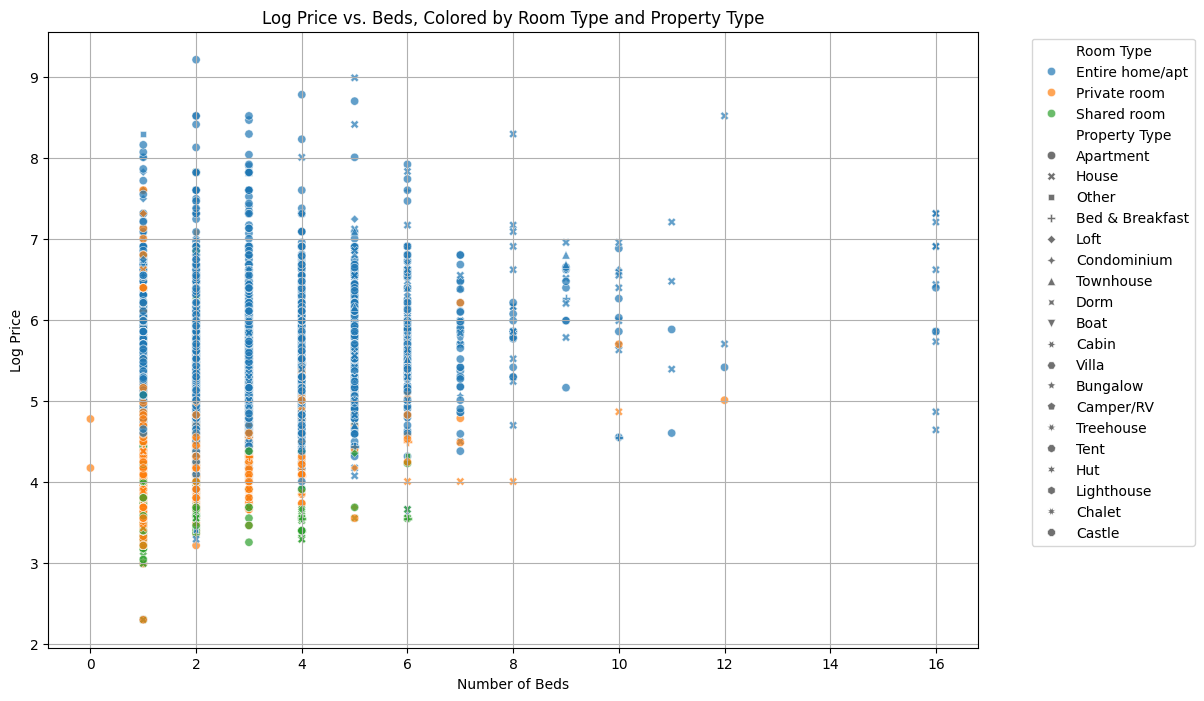

In [53]:
#6.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Beds', y='Price_Log', hue='Room Type', style='Property Type', data=df, alpha=0.7)
plt.xlabel('Number of Beds')
plt.ylabel('Log Price')
plt.title('Log Price vs. Beds, Colored by Room Type and Property Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.grid(True)
plt.show()

1. Room Type: Different room types (e.g., Entire home/apt, Private room, Shared room) tend to cluster at different log price levels, with entire homes/apartments generally having higher prices than private rooms, and shared rooms the lowest.
2. Property Type: Within each room type, different property types show varying distributions. For example, apartments might have a wider range of prices than more specialized property types like boats or cabins.
3. Bed Count: The general positive correlation between bed count and log price is still visible, but the spread and slope of this relationship may differ depending on the room type and property type.  For example, you might see that for "Entire home/apt" the slope is steeper (price increases more rapidly with beds) than for "Private room".
4. Outliers:  Outliers become more apparent.  You might see some very expensive "Shared room" or very cheap "Entire home/apt" listings.

In [54]:
price_by_room_prop = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print("\nPrice Description Grouped by Room Type and Property Type:")
print(price_by_room_prop)


Price Description Grouped by Room Type and Property Type:
                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15640.0  213.227941   218.222078   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              751.0  297.495340   468.678346   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft         

After running the code, examine the output of `price_by_room_prop`.
1. Highest Average Prices: Look for the combinations of 'Room Type' and 'Property Type' with the highest 'mean' values. These represent the most expensive types of listings on average.  Often, "Entire home/apt" combined with property types like "Loft", "Apartment" or "Villa" will be high.  Also look for unexpected combinations - sometimes niche property types (like "Castle" or "Chalet") rented as "Entire home/apt" can have very high average prices, but remember to check the 'count' column - this could be based on very few data points.
2. Highest Standard Deviations:  Look for the combinations with the highest 'std' values. These have the greatest price variability. A high standard deviation suggests that the prices within that group are widely dispersed. This can occur in property types that have a wide range of amenities, sizes, or locations.
3. Consideration of 'count':  Always consider the 'count' for each group. Statistics based on very small counts are less reliable.

Mean vs. Median for Central Tendency:
The median is generally a more reliable estimate of central tendency than the mean in this context.
AirBnB pricing data is often skewed, meaning it has a long tail of high-priced outliers. The mean is sensitive to these outliers, so a few very expensive listings can inflate the average price, making it seem higher than what's typical. The median, on the other hand, is the middle value, so it's not as affected by extreme values. It provides a better representation of the "typical" price in a given category.  Therefore, when comparing prices across different 'Room Type' and 'Property Type' combinations, focus on the median to get a more accurate sense of the typical price.


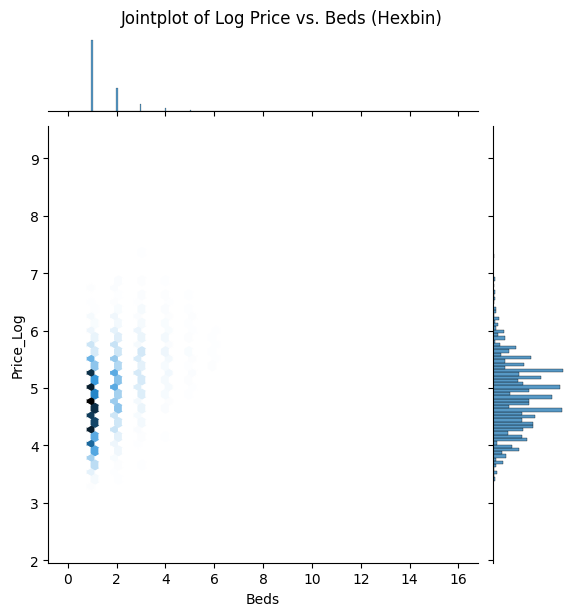

In [56]:
#7
sns.jointplot(x='Beds', y='Price_Log', data=df, kind='hex')
plt.suptitle('Jointplot of Log Price vs. Beds (Hexbin)', y=1.02)  # Added title
plt.show()


The hexbin plot shows the density of data points in the 'Beds' vs. 'Price_Log' space.
You'll typically see the highest density (darkest hexagons) in the lower-left corner of the plot. This means most listings have a small number of beds (1 or 2) and relatively low prices. The density decreases as you move towards higher bed counts and higher prices.
The marginal distributions (histograms on the top and right) show the distribution of 'Beds' and 'Price_Log' individually. The 'Beds' histogram is likely skewed towards lower bed counts, while the 'Price_Log' histogram should be more symmetrical than the original 'Price' distribution but might still have some skewness.


How it affects the way you think about plots in 5 and 6:

1. Confirmation of Dominant Trend: The hexbin plot confirms the overall positive relationship observed in the scatterplots (plots 5 & 6) – higher bed counts tend to be associated with higher prices. However, it emphasizes that this trend is most pronounced in the lower ranges of both variables.

2. Density Matters: The scatterplots in 5 and 6 might have given the impression that the relationship between 'Beds' and 'Price_Log' is evenly distributed across all values. The hexbin plot reveals that this isn't the case. The vast majority of data points are concentrated in a specific region. This means:

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.